In [50]:
# Imports libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Reads csv and assigns variable

df = pd.read_csv("train.csv")

Summary of data: The dataset contains information about Spotify tracks,
including 125 genres. The data has been compiled and cleaned using 
Spotify's Web API and Python, and it is presented in a CSV format. The 
dataset includes various columns providing details about each track, 
such as artists, album name, track name, popularity, duration, and 
explicit content. Additionally, there are audio features like 
danceability, energy, key, loudness, mode, speechiness etc... 

Questions to explore:
- Populatirity distribution across genres
- Correlation between audio features

In [28]:
# Shows the first 5 columns of the dataset
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


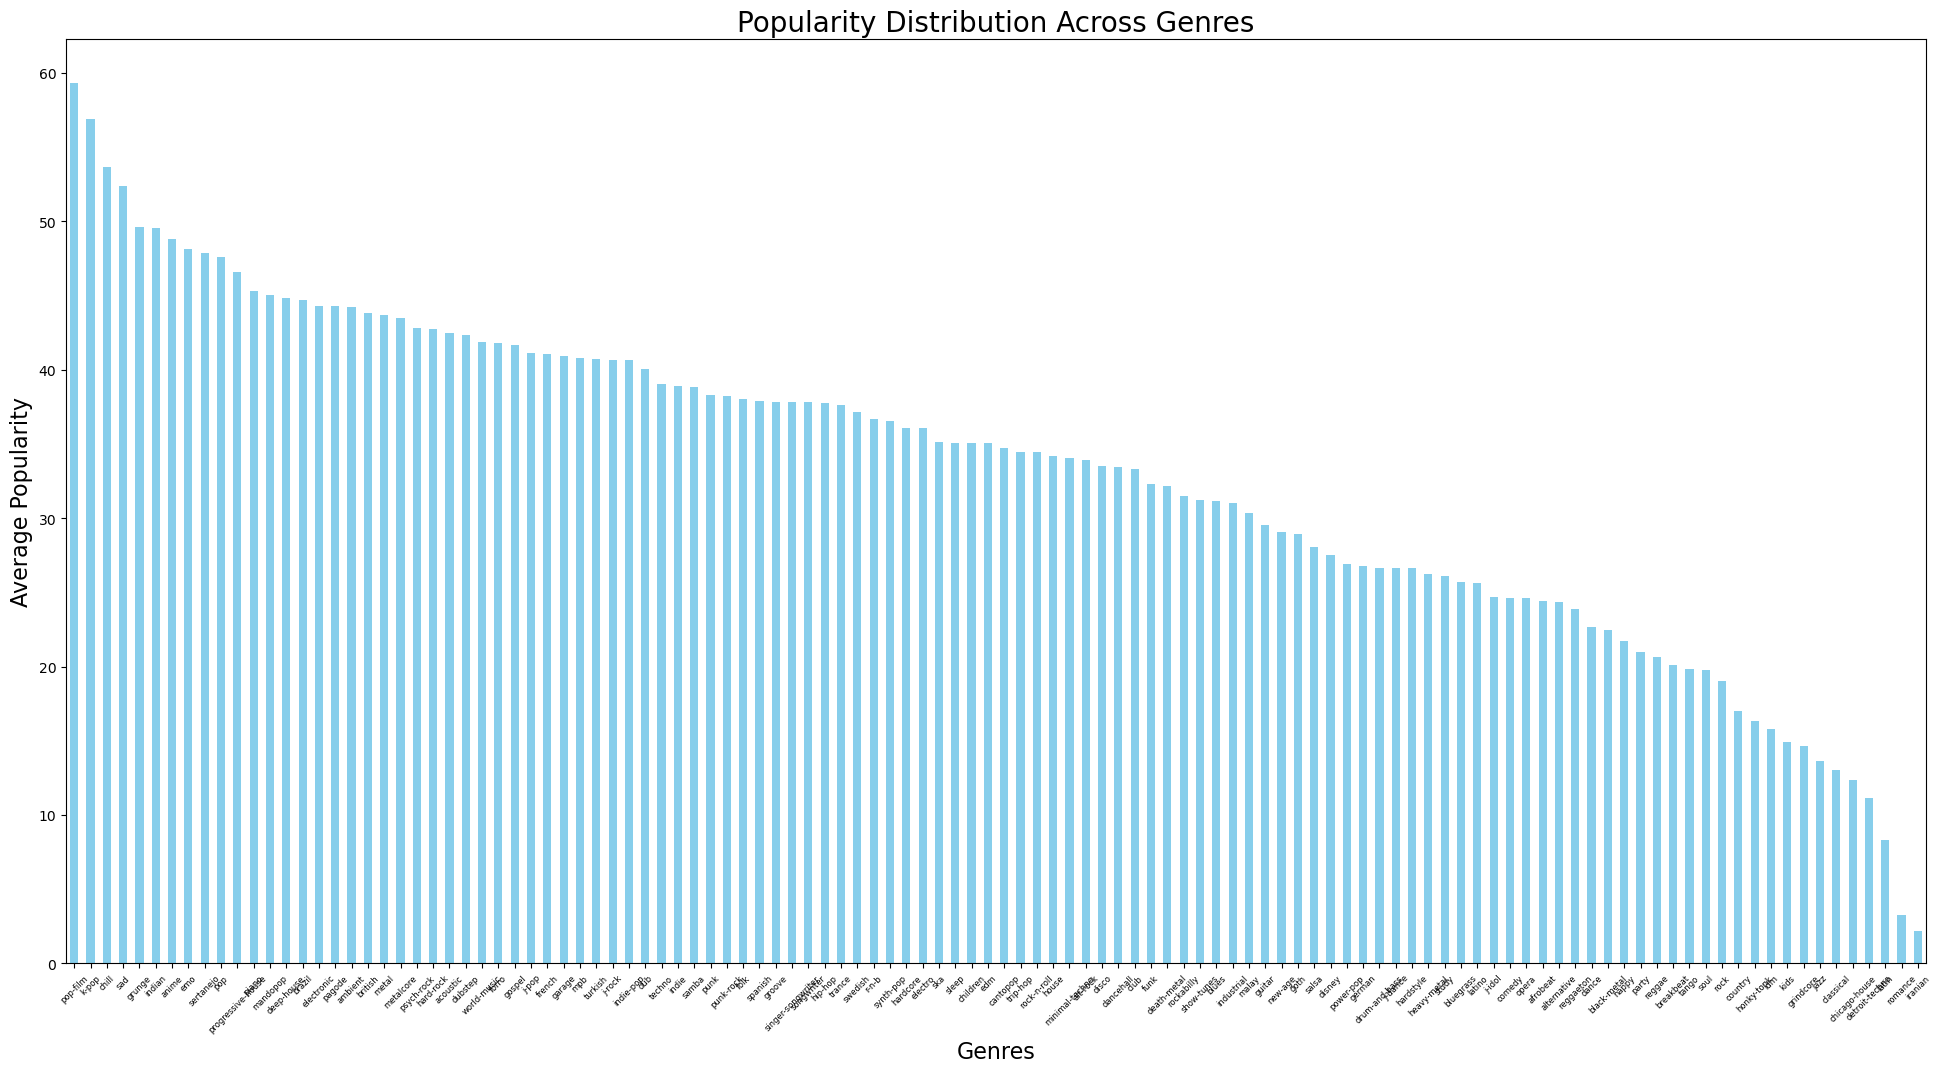

In [44]:
# Graph 1: Displays all genres based on popularity
plt.figure(figsize = (24, 12))
popularity_by_genre = df.groupby('track_genre')['popularity'].mean().sort_values(ascending = False)
popularity_by_genre.plot(kind = 'bar', color = 'skyblue')
plt.title('Popularity Distribution Across Genres', fontsize = 20)
plt.xlabel('Genres', fontsize = 16)
plt.ylabel('Average Popularity', fontsize = 16)
plt.xticks(rotation = 45, fontsize = 6)
plt.show()

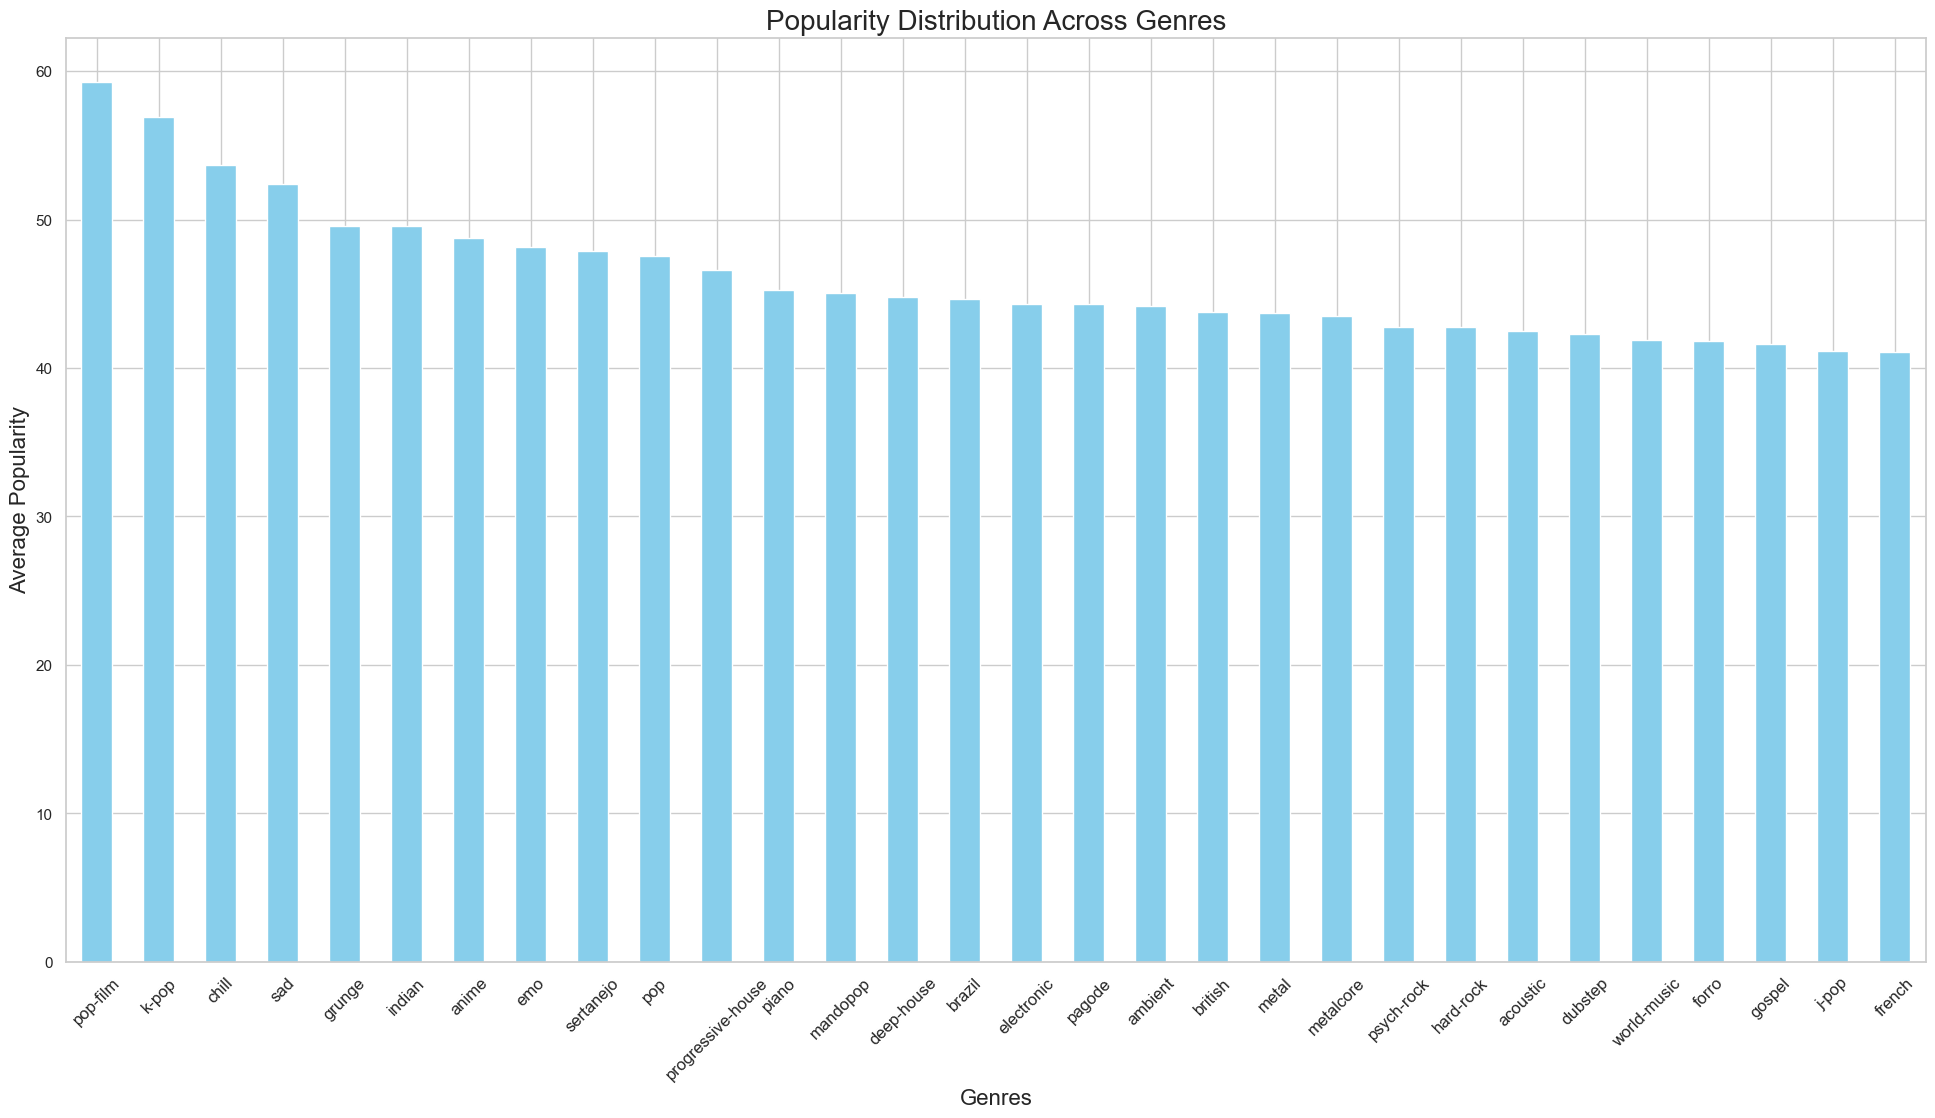

In [69]:
# Graph 2: Displays the top 30 genres based on popularity
plt.figure(figsize = (24, 12))
popularity_by_genre = df.groupby('track_genre')['popularity'].mean().sort_values(ascending = False).head(30)
popularity_by_genre.plot(kind = 'bar', color = 'skyblue')
plt.title('Popularity Distribution Across Genres', fontsize = 20)
plt.xlabel('Genres', fontsize = 16)
plt.ylabel('Average Popularity', fontsize = 16)
plt.xticks(rotation = 45, fontsize = 12)
plt.show()

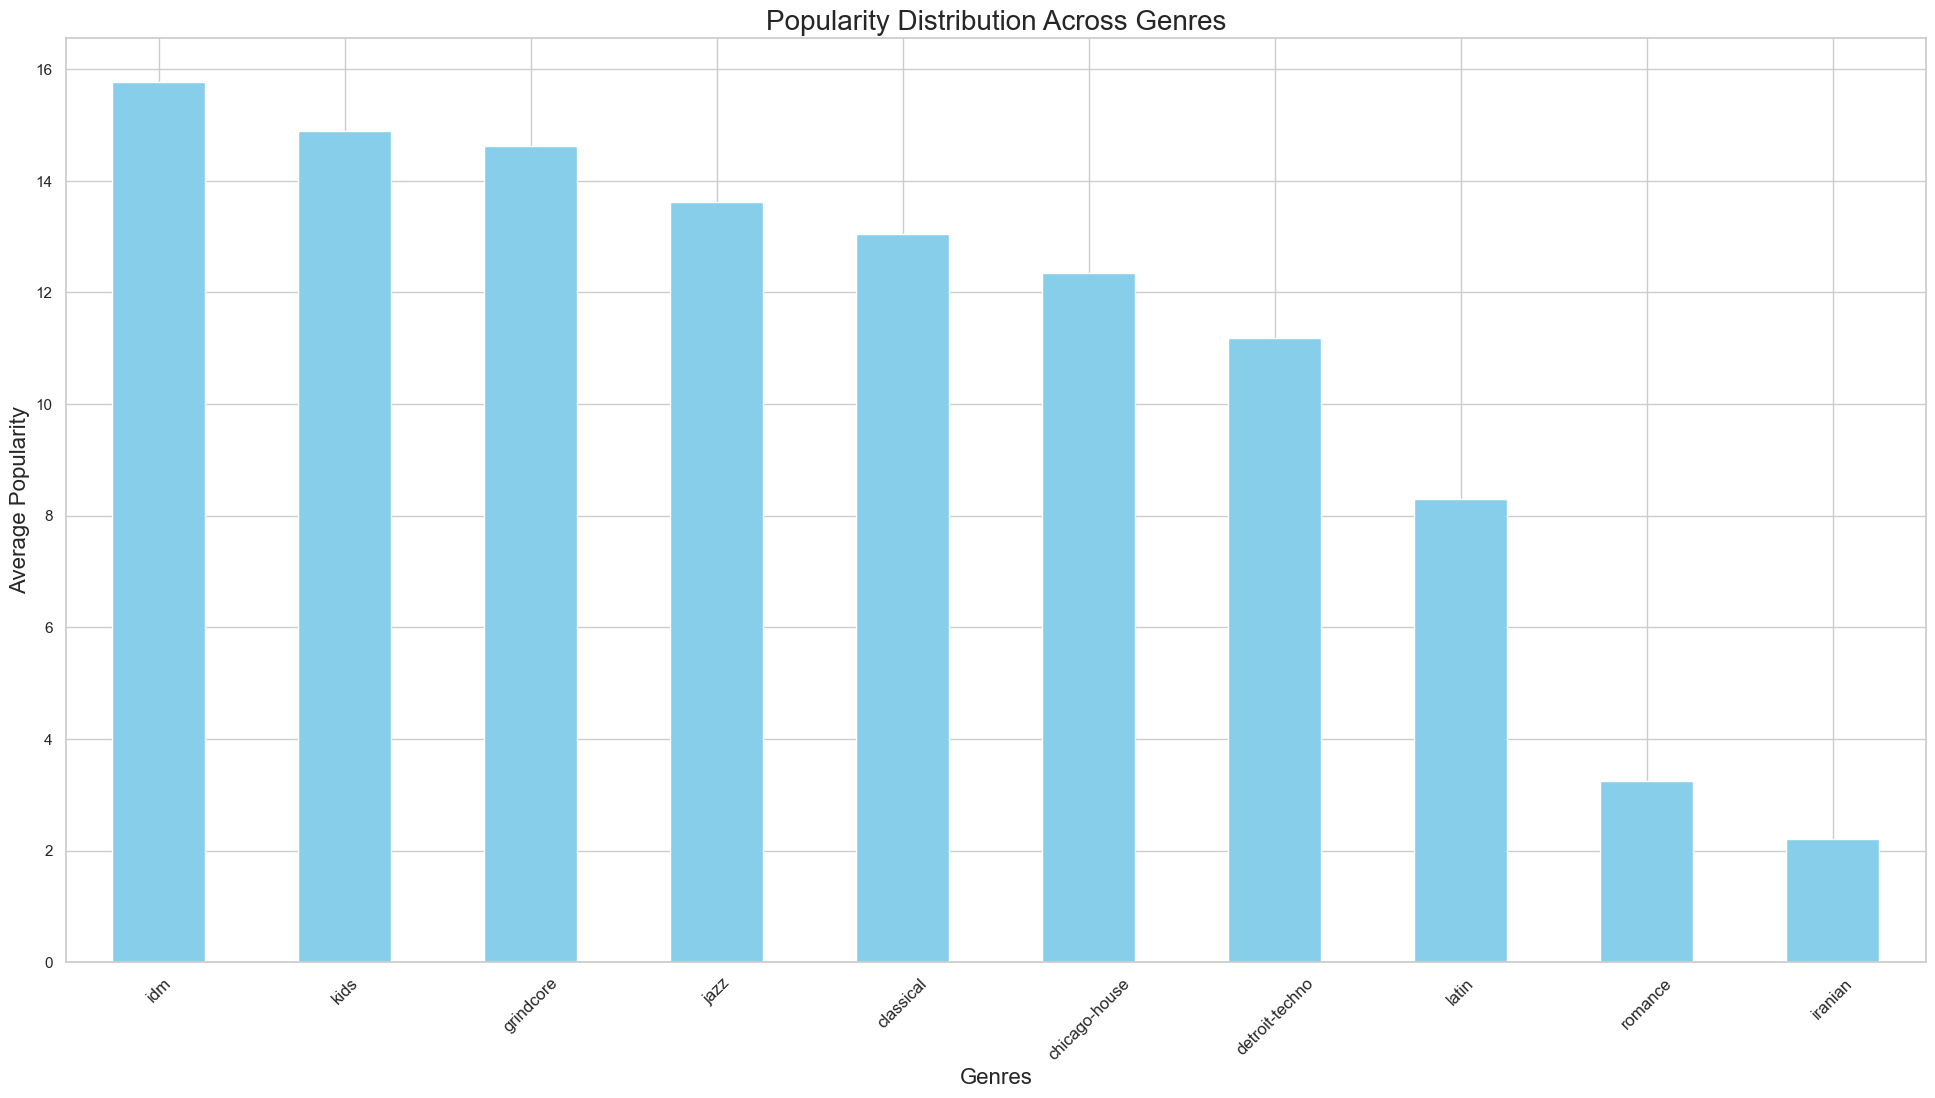

In [73]:
# Graph 3: Displays the last 10 genres based on popularity
plt.figure(figsize = (24, 12))
popularity_by_genre = df.groupby('track_genre')['popularity'].mean().sort_values(ascending = False).tail(10)
popularity_by_genre.plot(kind = 'bar', color = 'skyblue')
plt.title('Popularity Distribution Across Genres', fontsize = 20)
plt.xlabel('Genres', fontsize = 16)
plt.ylabel('Average Popularity', fontsize = 16)
plt.xticks(rotation = 45, fontsize = 12)
plt.show()

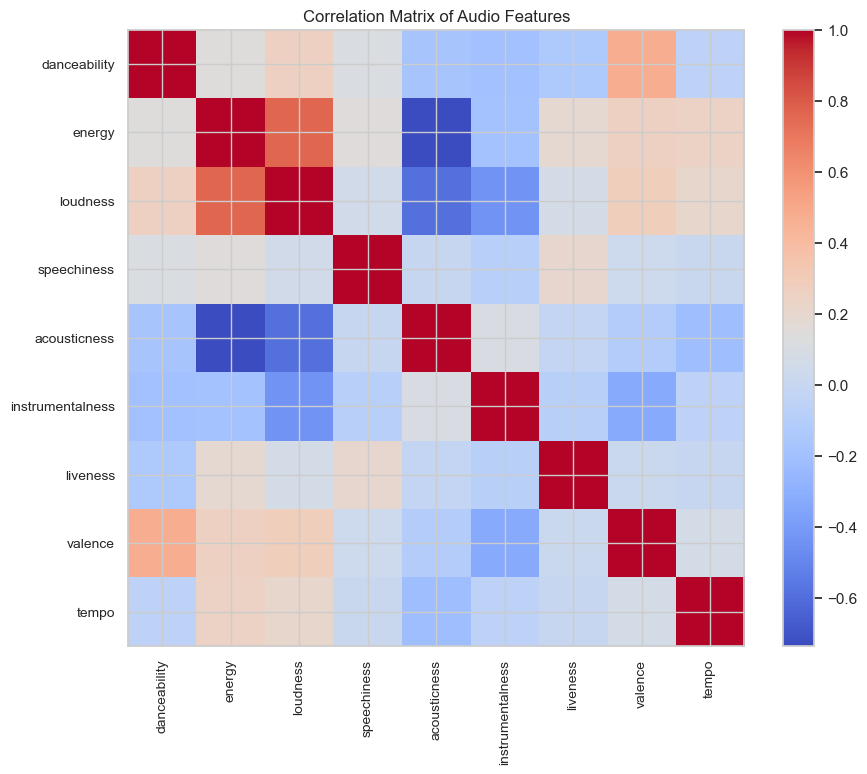

In [64]:
# Graph 4: Correlation matrix for audio features
audio_features = df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
                     'instrumentalness', 'liveness', 'valence', 'tempo']]
correlation_matrix = audio_features.corr()

plt.figure(figsize = (10, 8))
plt.imshow(correlation_matrix, cmap = 'coolwarm', interpolation = 'none')
plt.colorbar()
plt.title('Correlation Matrix of Audio Features')
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation = 90, fontsize = 10)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns, fontsize = 10)
plt.show()

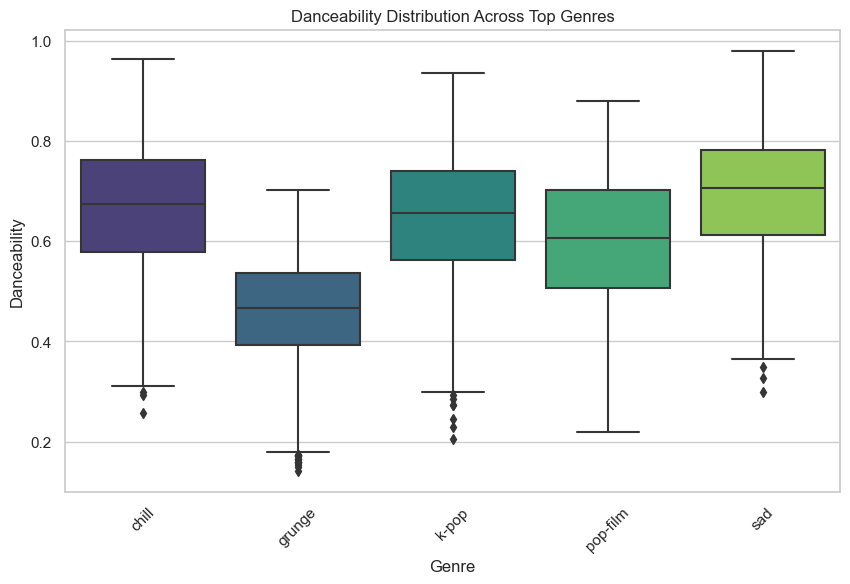

In [87]:
# Graph 5: Boxplot of the top 5 genres based on danceability
# Select top N genres by popularity
top_genres = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False).head(5).index

# Create a boxplot for danceability across top genres
plt.figure(figsize=(10, 6))
sns.boxplot(x='track_genre', y='danceability', data=df[df['track_genre'].isin(top_genres)], palette='viridis')
plt.title('Danceability Distribution Across Top Genres')
plt.xlabel('Genre')
plt.ylabel('Danceability')
plt.xticks(rotation=45)
plt.show()


Graph one displays all the genres and sorts by popularity while the second displays the top 30 genres. Here, you can see that pop-film and k-pop are the top genres in popularity. The 3rd graph displays the 10 lowest genres, and there are several that i've never heard of myself. I didn't expect to see classical music in the lowest 10 genres. Graph 4 represents the correlation between various audio features. Darker colors indicate a stronger relationship. Here it can be seen that energy and loudness has a high correlation suggesting that energetic tracks tend to be louder. It's also interesting to see that danceability has a low correlation between energy and loudness suggesting high energy and loudness doesn't equate to high danceability. Lastly, the 5th graph is a boxplot comparing danceability across the top 5 genres by popularity. Between the 5 top genres, danceability was above .6, exlcuding grunge which was lower than the rest.